# Lecture 5: Modeling Data

## This week:

- no problem set, one integrated lab, due at the usual problem set time (monday)

- covering mostly conceptual material, which will serve as the basis of understanding the stuff we do later.

## Things we do with data.

1. describe, summarize, visualize

2. infer latent structure, rules, properties, parameters

3. generalize to predict, interpolate, extrapolate

Classical statistics is mostly about #2.  Machine learning is mostly about #3.  Computational Social Science uses tools and models from both.

Both of these rely on fitting models to the data, but the design of the models, and model evaluation differ. 

## What is a model?

A model *assumes* some **structure** of the data, and has some **parameters** that are *fit* to the data.  The end result is an object that may be used in various ways for data summarization, inference, and prediction.

**Examples**: Linear regression, logistic regression, decision tree, neural networks of various architectures, support vector machine, etc. 

The structural assumptions constrain what kind of relationships can be captured by the model, but are also necessary to generalize beyond the data.

**Even when we simply describe or summarize data, we implicitly have a model in mind.**

I have the following data describing the flips of a coin ***how should I summarize them?***

In [12]:
data = ['H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T']

print(data)

['H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T']


In [15]:
p = data.count('H')/len(data) # probability of heads 
print(p)
# if we think the coin might be bent.

0.3076923076923077


In [17]:
# coin generated by a process that may be 
# likely to repeat previous outcome

transitions = []

prev = None
for outcome in data:
    if prev:
        if prev == outcome:
            transitions.append('same')
        else:
            transitions.append('different')
    prev = outcome

print(transitions)

['same', 'different', 'same', 'same', 'same', 'same', 'same', 'different', 'same', 'different', 'same', 'same']


In [20]:
p_same = transitions.count('same')/len(transitions)
print(p_same)

0.75


In [21]:
# spin a spinner.  if spinner lands in red then we stop flipping coin.
# if spinner lands on green, then we flip one more time.
len(data)

13

## Model parts.

**Structure:** These are the core assumptions of the model.  Whatever you do in the fitting process, these are not going to change, they are set in stone.  

e.g., in linear regression:  $\hat y = a x + b$

e.g., not $\hat y = a x^2 + b$

**Parameters:** These are the moving parts of the model that are fit to the data.

e.g., in linear regression: $a$ and $b$

**Loss / objective / goodness of fit function:** This is a function that can consider the model and its parameters, and the observed data, and returns a number indicating how well/badly the model fits.  How do I decide whether one value of the parameters is better or worse than another?

e.g., in linear regression: this could be mean squared error, or the likelihood under a normal probability distribution, or the posterior probability of a particular set of parameters, or the mean absolute error, or the quantile error, or... etc.

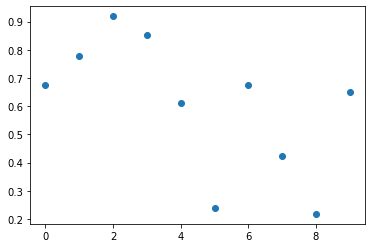

In [24]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.random.rand(10)

plt.scatter(x,y)

In [26]:
np.polyfit(x,y,1)

array([-0.04565326,  0.80888466])

In [27]:
predicted_y = np.random.rand(10)

(predicted_y - y)

array([ 0.03691605, -0.71812065, -0.40381006, -0.35395725, -0.37112517,
        0.07418823, -0.62220674, -0.39514485, -0.14159729, -0.19119455])

**Optimization algorithm:** how do I find the *best fitting* (loss minimizing, objective maximizing, goodness of fit maximizing) values of the parameters?

e.g., in linear regression, there are various linear algebra tricks available to do so robustly (out of scope here).  

## Model structures and parameters

There are *many*.  We will spend the bulk of class talking about the varieties of model structures that are out there, what they assume, and what they are good at.

## Loss functions

There are relatively few, for common problem types.  We will learn the basics of these because they are essential to understanding what models are doing.  

### Loss for Regression

Regression: predict some number from other data.  

Let's say we want to predict weight.  How do we evaluate how well we have done this?

In [31]:
weight = np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 165, 175, 100, 128])

In [30]:
# our loss function is a single number that 
# tells us how bad our predictions are.



**Errors**

1. Ratio error.

In [35]:
np.log(weight/predicted_weight)



array([ 0.        , -0.03077166,  0.        ,  0.87546874,  0.01550419])

2. Linear error

In [36]:
predicted_weight - weight

array([   0,    5,    0, -140,   -2])

**Summarizing errors**

Mean of the squared errors.

In [39]:
errors = predicted_weight - weight
errors

array([   0,    5,    0, -140,   -2])

In [41]:
# squared errors
errors**2

array([    0,    25,     0, 19600,     4])

In [43]:
(errors**2).sum()

19629

#### Sum squared error


In [70]:
def sse(predicted_y,y):
    return ((predicted_y - y)**2).sum()


In [73]:
sse(predicted_weight, weight)

19629

In [ ]:
weight = np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 165, 175, 100, 128])

sse(predicted_weight, weight)

In [74]:
weight = np.array([180, 160, 175, 240, 130, 180])

predicted_weight = np.array([180, 165, 175, 100, 128, 175])

# they increase with number of data points.  
# because we sum all data point errors squared.
sse(predicted_weight, weight)

19654

In [76]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

sse(predicted_weight, weight)

# sum of squared errors dominated by large errors.

19600

**Mean squared errors**

In [79]:
def mse(predicted_y,y):
    return ((predicted_y - y)**2).mean()

In [80]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

mse(predicted_weight, weight)

3920.0

Aside: standard error of the mean.

In [52]:
weight

array([180, 160, 175, 240, 130])

In [48]:
weight.mean()

177.0

In [50]:
weight.std()/(len(weight)**(1/2))

16.099689437998485

In [53]:
[177 - 2*16, 177 + 2*16]

[145, 209]

Simple model:

$\hat y = m$

In [69]:
# parameter / prediction
m = weight.mean()

# error
print(weight - m)
# squared error
print((weight - m)**2)
# sum of squared error
print(sum((weight - m)**2))
# mean of squared error
print(sum((weight - m)**2) / (len(weight)))

[  3. -17.  -2.  63. -47.]
[   9.  289.    4. 3969. 2209.]
6480.0
1296.0


In [67]:
m = weight.mean()
n = len(weight)
sum((weight - m)**2) / (n)

1296.0

**Loss function:** is some function of the prediction, and the actual data, that returns one number, which is bigger when our predictions are worse.

**Mean squared error**

**Mean absolute error**

**not exactly right proportion**

In [82]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

mse(predicted_weight, weight)

3920.0

In [83]:
def mae(predicted_y,y):
    return (np.abs(predicted_y - y)).mean()

In [85]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 175, 100, 130])

mae(predicted_weight, weight)

28.0

In [86]:
def mean_error(predicted_y,y):
    return (predicted_y - y).mean()

In [90]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([280, 60, 275, 140, 130])

mean_error(predicted_weight, weight)

0.0

In [92]:
def not_exactly_right_proportion(predicted_y, y):
    return (predicted_y != y).mean()

In [94]:
weight =           np.array([180, 160, 175, 240, 130])

predicted_weight = np.array([180, 160, 185, 100, 130])

not_exactly_right_proportion(predicted_weight, weight)

0.4

### Loss for Classification

Classification: predict a label, (in contrast to a number)

Let's say we want to predict sex (male/female).  How do we evaluate how well we have done this?

In [95]:
# binary predictions loss functions:

y = ['m', 'f', 'm', 'f', 'm']

predicted_y =  ['m', 'm', 'f', 'f', 'm']

In [97]:
def inaccuracy(predicted_y, y):
    return (predicted_y != y).mean()

In [98]:
y = ['m', 'f', 'm', 'f', 'm']

predicted_y =  [0.9, 0.2, 0.7, 0.5, 0.3]

Developing new loss functions is where a lot of the action is for state of the art machine learning, because this is where we specify what it means for a machine to achieve certain intelligent goals.  This is particularly important for RL, and other domains where we don't actually know what we mean by "intelligent behavior".

## Optimization algorithm

There are many. Very active area of research, we will generally not cover them in great detail.  Let's cover some basics though.

In [106]:
# goal: predict weight from height

# model is: predicted_y = slope * x + intercept

# parameters are: slope, intercept

# loss function:  mean absolute error

import pandas as pd

hw = pd.read_csv('height-weight.csv')

hw = hw[hw['height']>36]

hw

,height,weight
0,67.75,154.25
1,72.25,173.25
2,66.25,154.00
3,72.25,184.75
4,71.25,184.25
...,...,...
247,67.00,134.25
248,69.75,201.00
249,66.00,186.75
250,70.50,190.75


In [103]:
def predict(slope, intercept, x):
    return slope * x + intercept

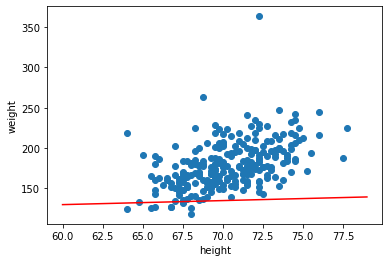

In [109]:
slope = 0.5
intercept = 100

plt.scatter(hw['height'], hw['weight'])
plt.xlabel('height')
plt.ylabel('weight')

x = np.arange(60, 80)
plt.plot(x, predict(slope, intercept, x), 'r-')

In [111]:
def mae(predicted_y, y):
    return np.abs(predicted_y - y).mean()

In [139]:
mae(predict(3, -30, hw['height']), hw['weight'])

20.21573705179283

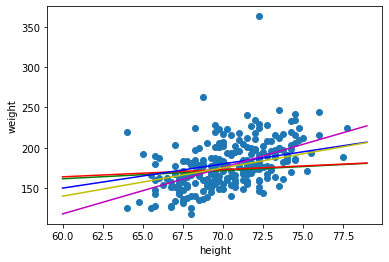

In [174]:
slope = 0.5
intercept = 100

plt.scatter(hw['height'], hw['weight'])
plt.xlabel('height')
plt.ylabel('weight')

x = np.arange(60, 80)
plt.plot(x, predict(1.01, 101, x), 'g-')
plt.plot(x, predict(0.9, 110, x), 'r-')
plt.plot(x, predict(3, -30, x), 'b-')
plt.plot(x, predict(5.75, -227, x), 'm-')
plt.plot(x, predict(3.5, -70, x), 'y-')

### Grid search

Consider a bunch of possible parameter settings.  Evaluate loss for each.  Pick the best one.

In [157]:
current_lowest = 1000000000

best_slope = None
best_intercept = None

for slope in np.linspace(0, 10, num = 100):
    for intercept in np.linspace(-500, 500, num = 100):
        current_mae = mae(predict(slope, 
                                  intercept, 
                                  hw['height']), 
                          hw['weight'])
        if current_mae < current_lowest:
            current_lowest = current_mae
            best_slope = slope
            best_intercept = intercept
        #print(f'{slope=}, {intercept=}, {current_mae=}')

print(current_lowest, best_slope, best_intercept)



18.837854642037907 5.757575757575758 -227.2727272727273


In [152]:
np.linspace(0, 5, num = 100)

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

### Random search

Start with some parameter values.  Propose a local perturbation.  If it is better, adopt that one, and continue.  Until some criterion is reached.

In [173]:
slope = 0
intercept = 0
current = mae(predict(slope, intercept, hw['height']), hw['weight'])

attempts = 0

while attempts < 100:
    new_slope = slope + (np.random.rand()-0.5)
    new_intercept = intercept + (np.random.rand()-0.5)*20
    
    new_mae = mae(predict(new_slope, 
                          new_intercept, 
                          hw['height']), 
                  hw['weight'])
    print(f'{current=} {new_mae=}')
    attempts += 1
    if new_mae < current:
        slope = new_slope
        intercept = new_intercept
        current = new_mae
        attempts = 0
        print(f'{slope=} {intercept=} {current=}')

current=178.82051792828688 new_mae=191.63358228126066
current=178.82051792828688 new_mae=201.71060626165996
current=178.82051792828688 new_mae=150.29705286178788
slope=0.3741338070349105 intercept=2.2178338850165047 current=150.29705286178788
current=150.29705286178788 new_mae=179.39262327142666
current=150.29705286178788 new_mae=129.9562594219549
slope=0.6139239124623888 intercept=5.698803497821061 current=129.9562594219549
current=129.9562594219549 new_mae=92.67739642713046
slope=1.0552956056465261 intercept=11.94448863880619 current=92.67739642713046
current=92.67739642713046 new_mae=84.98639930517872
slope=1.1162339278235236 intercept=15.350866199882478 current=84.98639930517872
current=84.98639930517872 new_mae=102.17340991847752
current=84.98639930517872 new_mae=85.17073448282345
current=84.98639930517872 new_mae=110.1308299838638
current=84.98639930517872 new_mae=109.42511014295658
current=84.98639930517872 new_mae=79.52042463866684
slope=1.0764509008992973 intercept=23.61401560

In [167]:
(np.random.rand()-0.5)

-0.3534541427447545

## Summary

model is some function that usually takes parameters and predicts data.

parameters are free to vary, structure of the model is set in stone

we can evaluate model predictions via a loss function, and smaller loss is better.

We find parameters that minimize the loss function.  this amounts to "fitting" the model.

this is done via some kind of optimization algorithm.





### Gradient descent

Start with some parameter values.  Figure out which direction of change in parameter values reduces the loss.  Change parameter values in that direction.  Repeat until some criterion is reached.

$L(a,b) = \frac{1}{n} \sum_{i=0}^n (\hat y_i - y_i)^2$

$L(a,b) = \frac{1}{n} \sum_{i=0}^n (a x_i + b - y_i)^2$

$\frac{\partial L(a,b)}{\partial a} = \frac{1}{n} \sum_{i=0}^n 2 (a x_i + b - y_i) x_i$

$\frac{\partial L(a,b)}{\partial b} = \frac{1}{n} \sum_{i=0}^n 2 (a x_i + b - y_i)$

## Writing our own model class

### What kinds of operations should a model support?

- predict data, usually given some input

- evaluate the quality of its predictions given some ground truth observations

- fit its parameters to observed data

- for *inferential statistics*: compare its fitted parameters to null values, provide confidence intervals on parameters, etc.


### Baby steps

**for linear regression**

#### predict

Write a function that takes in `x`x a 1d numpy array of length `n`, and returns a 1d array of `n` predicted y values, given `slope=0.5`, and `intercept=50`

#### evaluate

Write a function that takes in `x` and `y` (both arrays of length `n`) and returns the mean squared error of the prediction.

#### fit

Write a function that takes in `x` and `y` and finds some good values of slope and intercept by minimizing the mean squared error loss function, somehow.